# Training and Running of new GLM model
This Notebook is for training and running the our new GLM model that includes (for now only) deletion tokens

## Adding necessary imports
You can run this block to import necessary classes and functions

In [3]:
from fundemental_classes.model_related.glm_model import GLMModel

# You can change force_retrain to True if you want to always retrain your model everytime
model = GLMModel("./dna_bert_final", "simulated_sequences/augumented_sequence_size10000_length150_deletions0.2_nodeletionseq0.1.fasta", force_retrain=False)

loading file tokenizer.json
loading file tokenizer.model
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading file chat_template.jinja


Checking for existing trained model in ./dna_bert_final
Loading tokenizer...
Tokenizer loaded
Loading dataset...
Dataset loaded
Loading model...


loading configuration file ./dna_bert_final/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 256,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 8,
  "num_hidden_layers": 8,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.55.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 10
}

loading weights file ./dna_bert_final/model.safetensors
All model checkpoint weights were used when initializing BertForMaskedLM.

All the weights of BertForMaskedLM were initialized from the model checkpoint at ./dna_bert_final.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertF

Model loaded successfully!
Trained for 500 epochs
Final validation loss: 1.3199


## Training
We use `Bert` model to create the embeddings and train it using masking to get nicely trained model. If you want to change the size of training data, please look into `simulated_sequences` directory. \\\
*important:* Training is not necessary if you already have a trained model. You can load it using the `GLMModel`.

In [ ]:
model.train(epochs=500, batch_size=32, lr=2e-4)

PyTorch: setting up devices
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
average_tokens_across_devices is True but world size is 1. Setting it to False automatically.
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Dataset split: 8000 training, 2000 validation
Starting Training


***** Running training *****
  Num examples = 8,000
  Num Epochs = 500
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 125,000
  Number of trainable parameters = 8,620,042


Step,Training Loss,Validation Loss
500,1.491100,1.480656
1000,1.477300,1.477375
1500,1.473700,1.477642
2000,1.472400,1.472706
2500,1.471300,1.471085
3000,1.469900,1.469263
3500,1.470700,1.477932
4000,1.469800,1.470786
4500,1.469700,1.465432
5000,1.469900,1.469724



***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final/checkpoint-500
Configuration saved in ./dna_bert_final/checkpoint-500/config.json
Model weights saved in ./dna_bert_final/checkpoint-500/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./dna_bert_final/checkpoint-500/special_tokens_map.json

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final/checkpoint-1000
Configuration saved in ./dna_bert_final/checkpoint-1000/config.json
Model weights saved in ./dna_bert_final/checkpoint-1000/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final/checkpoint-1000/tokenizer_config.json
Special tokens file sav

## Visualization | Sequence reconstruction probabilities
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\
*Important:* For now we pass our test cases by hand. However in the future we will generate good inputs to test how well the model functions

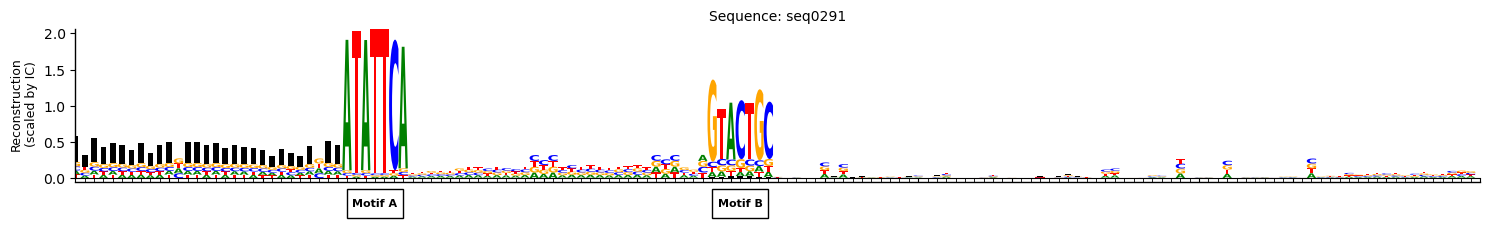

In [4]:
from fundemental_classes.visualization.sequence_plotter import plot


header = ">seq0291|label=both|posAmotif=29|posBmotif=68|gaplength=30|deletions=11"
sequence = "ACGTGCAGAGC-TCCCTTTTGAGGAC-GTATATTCACGGTTGTAGTGCCG-GTCTTCTCTAAA-TCTCGTACTGCTACGA-C-ACCTCTATTGCACTTAACTCCTACTAA--CATGAC-GCTT-TAACGTAG-ATCAATAATACATCAAG"
prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)

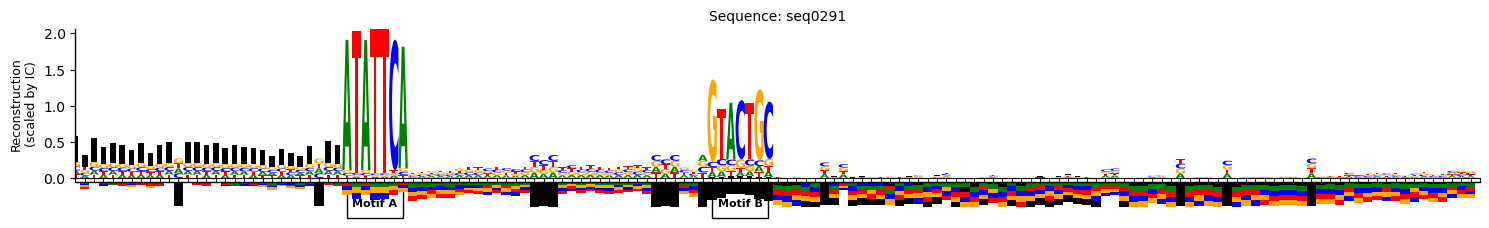

In [ ]:
from fundemental_classes.visualization.sequence_plotter_new import plot


header = ">seq0291|label=both|posAmotif=29|posBmotif=68|gaplength=30|deletions=11"
sequence = "ACGTGCAGAGC-TCCCTTTTGAGGAC-GTATATTCACGGTTGTAGTGCCG-GTCTTCTCTAAA-TCTCGTACTGCTACGA-C-ACCTCTATTGCACTTAACTCCTACTAA--CATGAC-GCTT-TAACGTAG-ATCAATAATACATCAAG"
prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)


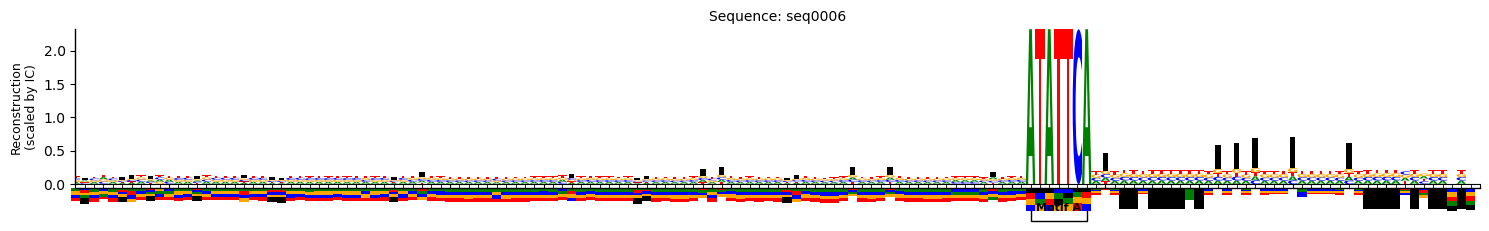

In [3]:
from fundemental_classes.visualization.sequence_plotter_new import plot


header = ">seq0006|label=A_only|posAmotif=102|posBmotif=None|gaplength=None|deletions=28"
sequence = "A-ATT--T-GCAT-AAGG-GT--TGGGTGGGCAG-CT-TCGGGGACTAGTGTG-TGCGTT--AGCCC-T-ACTGAC--TTTCC-AAA-CCGCGGCAAT-AAGATATTCAC-AGCTGCACAAA-A-C-AGC-TCACG-GGGTAATCCA-T-"
prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)

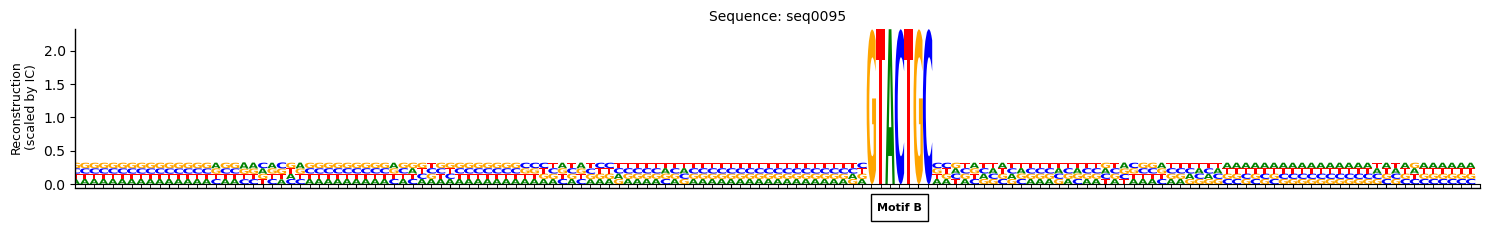

In [10]:

header = ">seq0095|label=B_only|posAmotif=None|posBmotif=85|gaplength=None|deletions=0"
sequence = "TTTGCCTAACGAACCCTATTTTTCCGTCACGAGCCTGTTGGAGAGGGAGCAGGTCCTCACCGGGTGTAAAGGTCGGGCGAAACGCGTACTGCGCATATCAGACACAGGGAATGTTCGATTAGACTTGCGCGCCTTTGGGAACTCGGTAAT"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6)


## Visualization | Dependency Map
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\

Computing dependency map...


Map:   0%|          | 0/165 [00:00<?, ? examples/s]

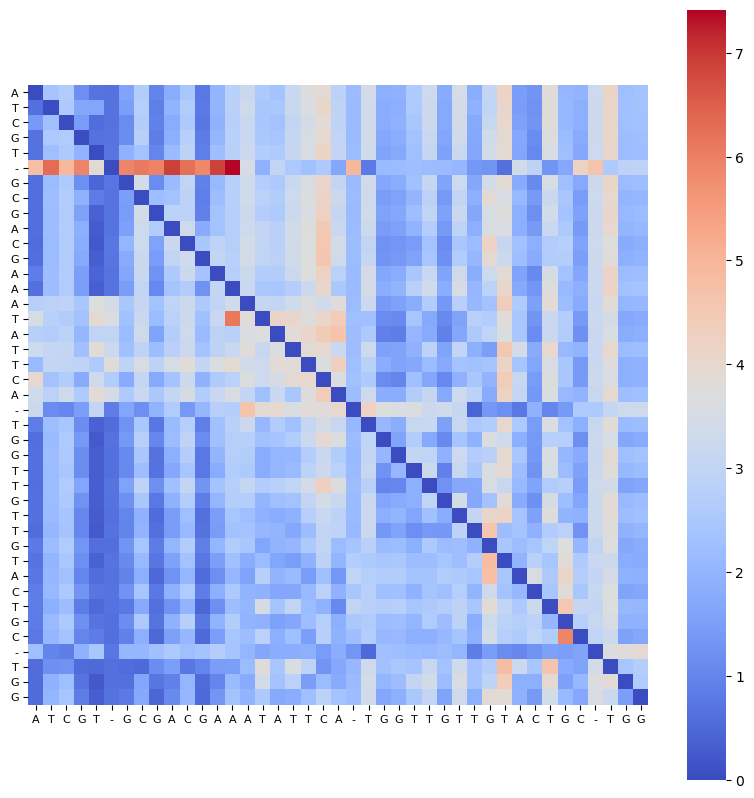

In [13]:

from fundemental_classes.visualization.heat_map_plotter import DependencyMapGenerator

dep_gen = DependencyMapGenerator(model)

header = "seq94229|label=both|posAmotif=14|posBmotif=32|gaplength=10|deletions=3"
sequence = "ATCGT-GCGACGAAATATTCA-TGGTTGTTGTACTGC-TGG"
dep_map = dep_gen.analyze(sequence)
